In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import timedelta
import warnings
import os
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.linear_model import LinearRegression


In [2]:
#load the data
messi=pd.read_csv('Messi.csv')
cr7=pd.read_csv('Ronaldo.csv')

In [3]:
messi.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,04/05,LaLiga,34,05-01/05,H,FC Barcelona,Albacete Balompie,2:00,CF,90+1,2:00,Left-footed shot,Ronaldinho Gaacho
1,05/06,UEFA Champions League,Group Stage,11-02/05,H,FC Barcelona,Panathinaikos Athens,5:00,RW,34,3:00,Left-footed shot,NaN
2,05/06,LaLiga,13,11/27/05,H,FC Barcelona,Racing Santander,4:01,RW,51,2:00,Left-footed shot,Samuel Etoo
3,05/06,LaLiga,19,1/15/06,H,FC Barcelona,Athletic Bilbao,2:01,RW,50,2:01,Left-footed shot,Mark van Bommel
4,05/06,LaLiga,20,1/22/06,H,FC Barcelona,Deportivo Alaves,2:00,CF,82,2:00,Left-footed shot,Ronaldinho Gaacho


In [4]:
cr7.head()

,Season,Competition,Matchday,Date,Venue,Club,Opponent,Result,Playing_Position,Minute,At_score,Type,Goal_assist
0,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,34,2:00,Solo run,NaN
1,02/03,Liga Portugal,6,10-07-02,H,Sporting CP,Moreirense FC,3:00,LW,90+5,3:00,Header,Rui Jorge
2,02/03,Liga Portugal,8,10/26/02,A,Sporting CP,Boavista FC,1:02,NaN,88,1:02,Right-footed shot,Carlos Martins
3,02/03,Taca de Portugal Placard,Fourth Round,11/24/02,H,Sporting CP,CD Estarreja,4:01,NaN,67,3:00,Left-footed shot,Cesar Prates
4,02/03,Taca de Portugal Placard,Fifth Round,12/18/02,H,Sporting CP,FC Oliveira do Hospital,8:01,NaN,13,3:00,NaN,NaN


In [5]:
messi['Season'] = messi['Season'].replace({'11-Dec': '11/12', 'Dec-13': '12/13'})
cr7['Season'] = cr7['Season'].replace({'Dec-13': '12/13'})


In [6]:
# basic exploration
cr7.describe(include=['object']).T

,count,unique,top,freq
Season,710,21,14/15,61
Competition,710,17,LaLiga,311
Matchday,710,52,Group Stage,75
Date,710,468,09-12-15,5
Venue,710,2,H,404
Club,710,5,Real Madrid,450
Opponent,710,129,Sevilla FC,27
Result,710,57,3:00,49
Playing_Position,652,5,LW,356
Minute,710,106,90,17


In [7]:
messi.describe(include=['object']).T

,count,unique,top,freq
Season,704,19,11/12,73
Competition,704,10,LaLiga,474
Matchday,704,48,Group Stage,80
Date,704,455,03/07/12,5
Venue,704,2,H,420
Club,704,2,FC Barcelona,672
Opponent,704,98,Sevilla FC,38
Result,704,55,4:00,47
Playing_Position,704,9,CF,276
Minute,704,97,55,14


* Cristiano Ronaldo has been playing club football for 21 years.
* Lionel Messi has been playing club football for 19 years.

# **1. Goalscoring Trends**


## a) Overall Total Goals

In [8]:
print('The number of goals scored in their entire career for clubs by Cristiano Ronaldo',cr7['Minute'].count())
print('The number of goals scored in entire career for clubs by Lionel Messi',messi['Minute'].count())

The number of goals scored in their entire career for clubs by Cristiano Ronaldo 710
The number of goals scored in entire career for clubs by Lionel Messi 704


## b) Goals Per Season

In [9]:
px.histogram(
    messi,
    x='Season',
    title=" Messi Goals per season",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])

In [10]:
px.histogram(
    cr7,
    x='Season',
    title="Ronaldo Goals per season",
    log_x=False,
    log_y=False, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Season','Club'])

* Lionel Messi scored the most number of goals in **2011/12** season (**73**) followed by the **2012/13** (**60**) season.
* Cristiano Ronaldo score most goals in the **2014/15** season (**61**) followed by the **2011/2012** season (**60**).


## c) Goals Per Competition

In [11]:
px.histogram(
    messi,
    x='Competition',
    title="Messi Goals per competition",
    log_x=False,
    log_y=False, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])


In [12]:
pd.DataFrame(messi.Competition.value_counts())

,count
Competition,
LaLiga,474
UEFA Champions League,128
Copa del Rey,56
Ligue 1,21
Supercopa,14
FIFA Club World Cup,5
UEFA Super Cup,3
Trophée des Champions,1
Troph�e des Champions,1


In [13]:
px.histogram(
    cr7,
    x='Competition',
    title="Ronaldo Goals per competition",
    log_x=False,
    log_y=False, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Competition','Club'])

In [14]:
pd.DataFrame(cr7.Competition.value_counts())

,count
Competition,
LaLiga,311
UEFA Champions League,140
Premier League,103
Serie A,81
Copa del Rey,22
FA Cup,13
Saudi Pro League,9
FIFA Club World Cup,7
EFL Cup,4


* Both players scored most of their goals in Laliga; Lionel Messi **(474)**, Cristiano Ronaldo **(371)**
* Messi has  **128** goals while Ronaldo has scored **140** goals in the UEFA Champions League


## d) Goals Per Club

i. Goals per club per Season

In [15]:
px.histogram(
    messi,
    x='Club',
    title=" Messi Goals per Club - Seasons",
    log_x=False,
    log_y=False,
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

In [16]:
pd.DataFrame(messi.Club.value_counts())

,count
Club,
FC Barcelona,672
Paris Saint-Germain,32


In [17]:
px.histogram(
    cr7,
    x='Club',
    title="Ronaldo Goals per Club - Seasons",
    log_x=False,
    log_y=False,
    height=500,
    color='Season',
    hover_name='Season',
    hover_data=['Competition','Season','Club'])

In [18]:
pd.DataFrame(cr7.Club.value_counts())

,count
Club,
Real Madrid,450
Manchester United,145
Juventus FC,101
Al-Nassr FC,9
Sporting CP,5


* Club-wise Messi scored most of his  goals (**73**) in the 2011/12 season while at FC Barcelona. 
* Ronaldo's most goals (**61**) were in the **2014/15** season while at Real Madrid. 

ii. Goals Scored per Club-Competition

In [19]:
px.histogram(
    messi,
    x='Club',
    title="Messi Goals per Clubs - Competition",
    log_x=False,
    log_y=False,
    height=500,
    color='Competition',
    hover_name='Competition',
    hover_data=['Competition','Season','Club'])

In [20]:
px.histogram(
    cr7,
    x='Club',
    title="Ronaldo Goals per Clubs - Competition",
    log_x=False,
    log_y=False,
    height=500,
    color='Competition',
    hover_name='Competition',
    hover_data=['Competition','Season','Club'])

* Messi scored **474** goals in Laliga while at FC Barcelona. 
* Ronaldo scored **311** goals in Laliga while at Real Madrid

## e) Goals by Playing Position

In [21]:

px.histogram(
    messi,
    x='Playing_Position',
    title=" Messi Goals by playing Position",
    log_x=False,
    log_y=False, 
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

In [22]:

px.histogram(
    cr7,
    x='Playing_Position',
    title="Ronaldo Goals by playing Position",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

* Messi has scored **276** goals playing as a Center-Forward.
* Ronaldo has scored **356** goals playing as a Left-Winger

## f) Goals by Type

In [23]:
px.histogram(
    messi,
    x='Type',
    title=" Messi Goals by Type",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

In [24]:
px.histogram(
    cr7,
    x='Type',
    title=" Messi Goals by Type",
    log_x=False,
    log_y=False,
    height=500,
    color='Club',
    hover_name='Club',
    hover_data=['Playing_Position','Competition','Season','Club'])

* **436** goals Messi's goals were scored on his Left-foot, **86** goals with his right-foot and **84** goals as penalties.
* Ronaldo has scored **253** goals with his Right-foot, **113** goals with his left-foot and **132** goals as penalties.

## g) Goals Per Opponent

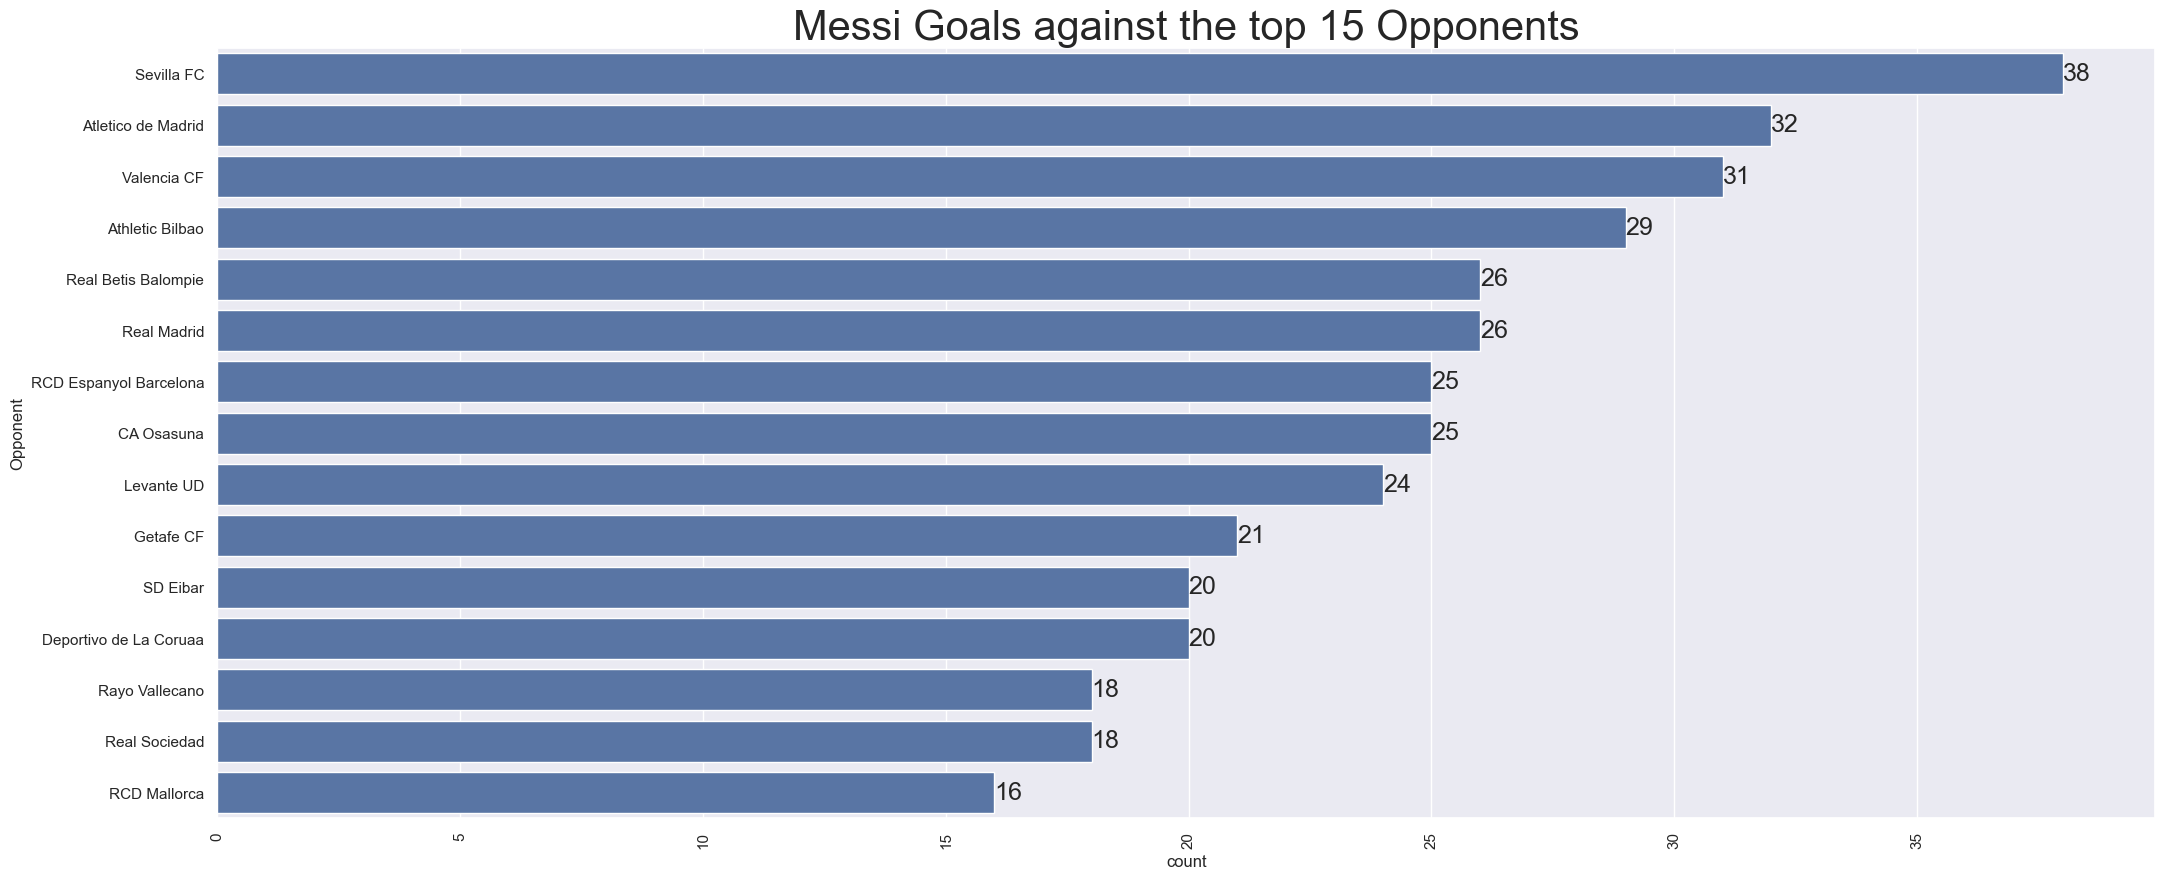

In [25]:
#top 15 opponents
sns.set(rc={'figure.figsize':(25,10)})
top_15_opponents = messi['Opponent'].value_counts().nlargest(15).index
plt.xticks(rotation='vertical')
p=sns.countplot(messi['Opponent'],hue_order=messi.groupby('Competition'),order=top_15_opponents)
p.axes.set_title("Messi Goals against the top 15 Opponents",fontsize=30)
# Display counts on the bars
for container in p.containers:
    p.bar_label(container, label_type='edge', fontsize=18)

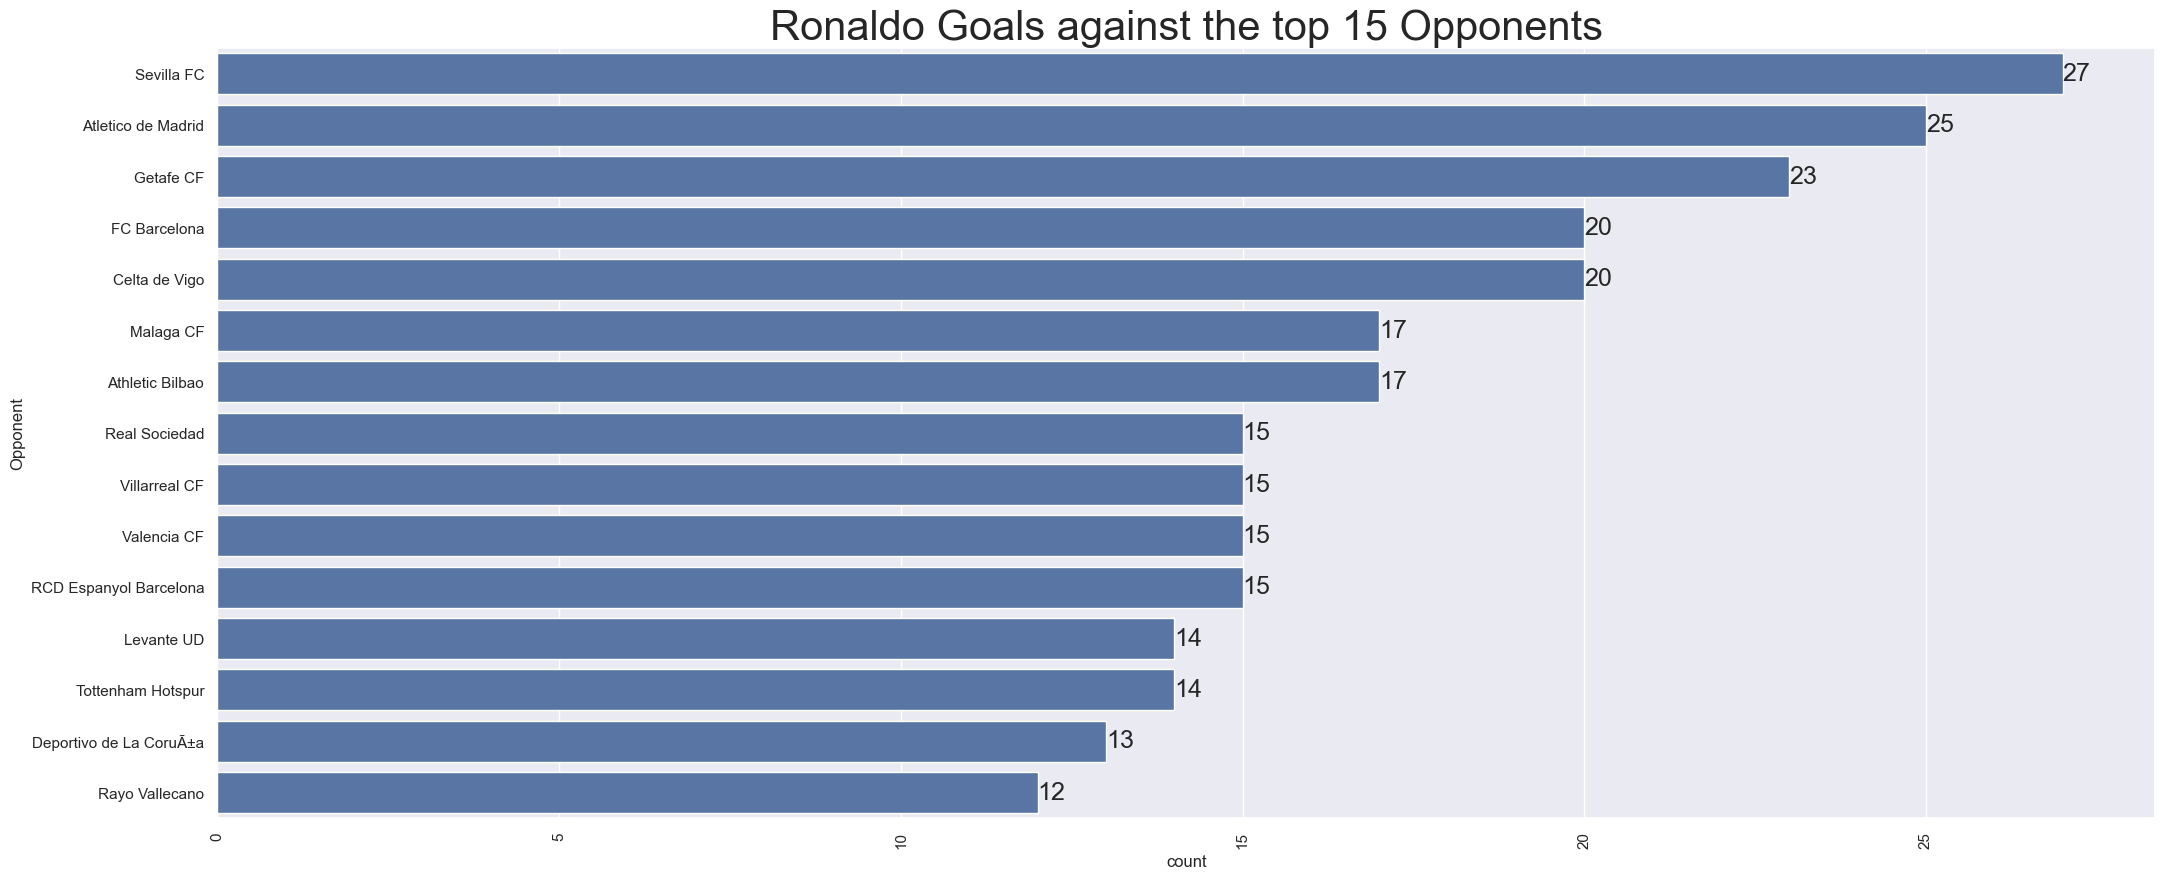

In [26]:
#top 15 opponents
sns.set(rc={'figure.figsize':(25,10)})
top_15_opponents = cr7['Opponent'].value_counts().nlargest(15).index
plt.xticks(rotation='vertical')
p=sns.countplot(cr7['Opponent'],hue_order=cr7.groupby('Competition'),order=top_15_opponents)
p.axes.set_title("Ronaldo Goals against the top 15 Opponents",fontsize=30)
# Display counts on the bars
for container in p.containers:
    p.bar_label(container, label_type='edge', fontsize=18)

Both Messi and Ronaldo have scored most goals against Sevilla; Messi **38**, Ronaldo **27**

## h) Goals Home vs Away

<Axes: title={'center': 'Messi Goals according to Venue'}, ylabel='count'>

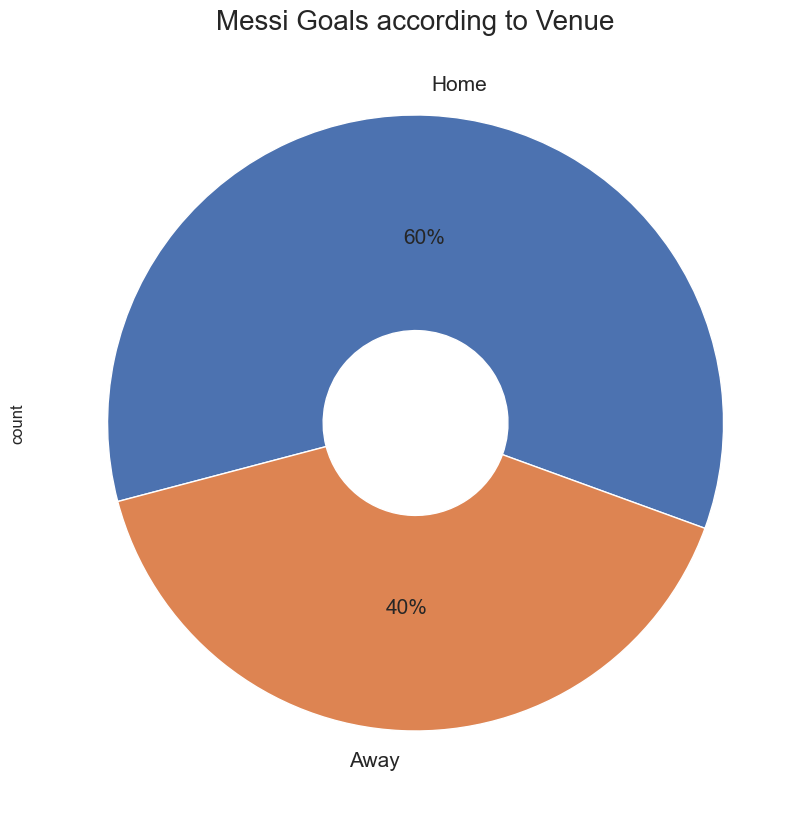

In [27]:
plt.figure(figsize=(10,10))
plt.title('Messi Goals according to Venue', fontsize=20)
messi.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

<Axes: title={'center': 'Ronaldo Goals according to venue'}, ylabel='count'>

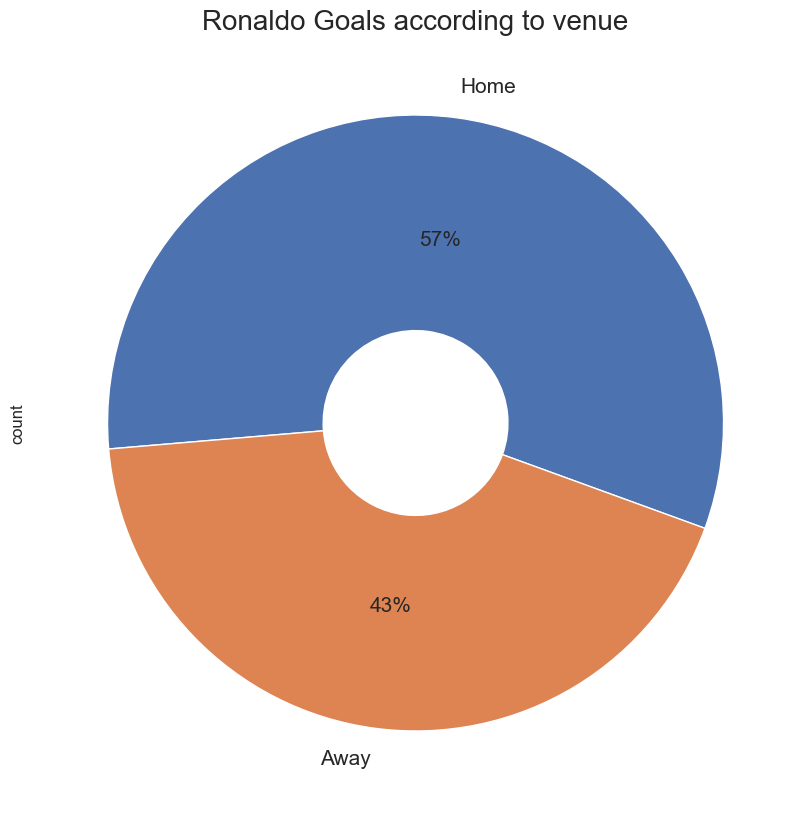

In [28]:
plt.figure(figsize=(10,10))
plt.title('Ronaldo Goals according to venue', fontsize=20)
cr7.Venue.value_counts().plot(kind='pie', labels=['Home', 'Away'], wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20,  textprops={'fontsize': 15})

## i) Goals after Getting Assists from other Players

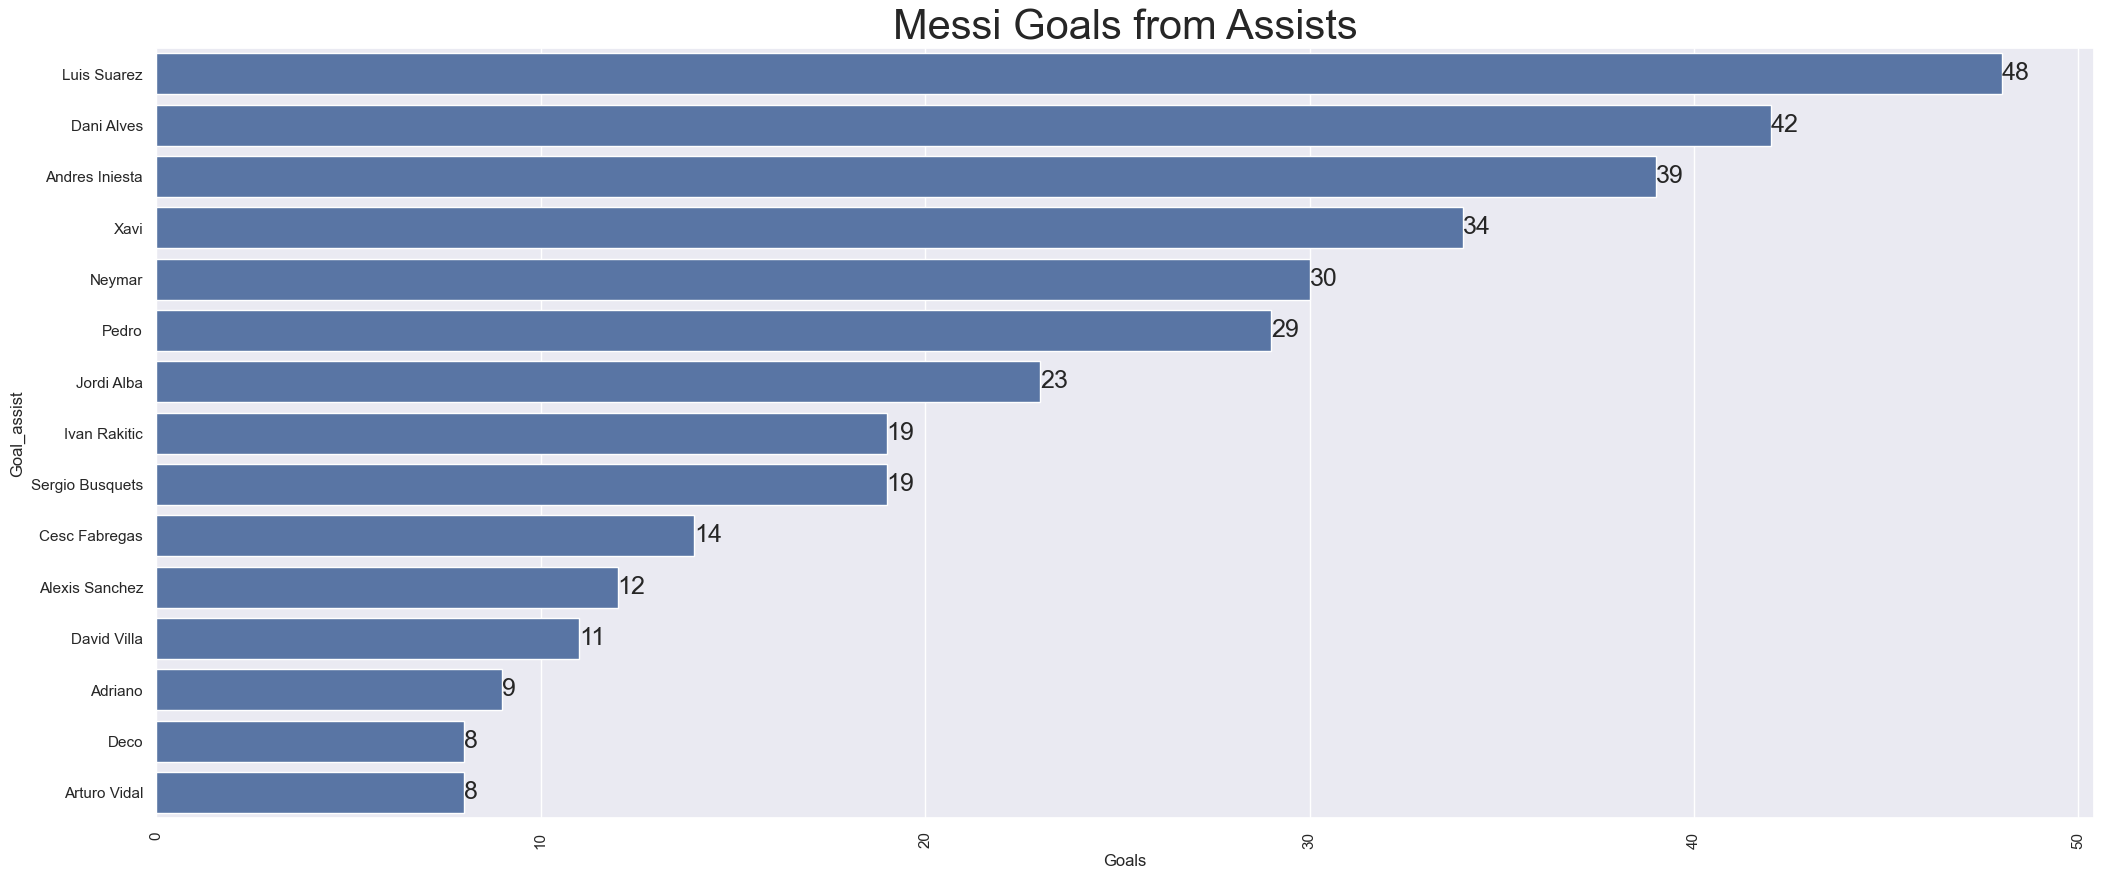

In [29]:
#top 15
sns.set(rc={'figure.figsize':(25,10)})
top_15_Assists = messi['Goal_assist'].value_counts().nlargest(15).index
plt.xticks(rotation='vertical')
p=sns.countplot(messi['Goal_assist'],order=top_15_Assists)
p.axes.set_title("Messi Goals from Assists",fontsize=30)
p.set_xlabel("Goals")
# Display counts on the bars
for container in p.containers:
    p.bar_label(container, label_type='edge', fontsize=18)

Luiz Suarez (**48**), Dani Alves (**42**), and Andres Iniesta (**39**)produced the most assists for Messi. 

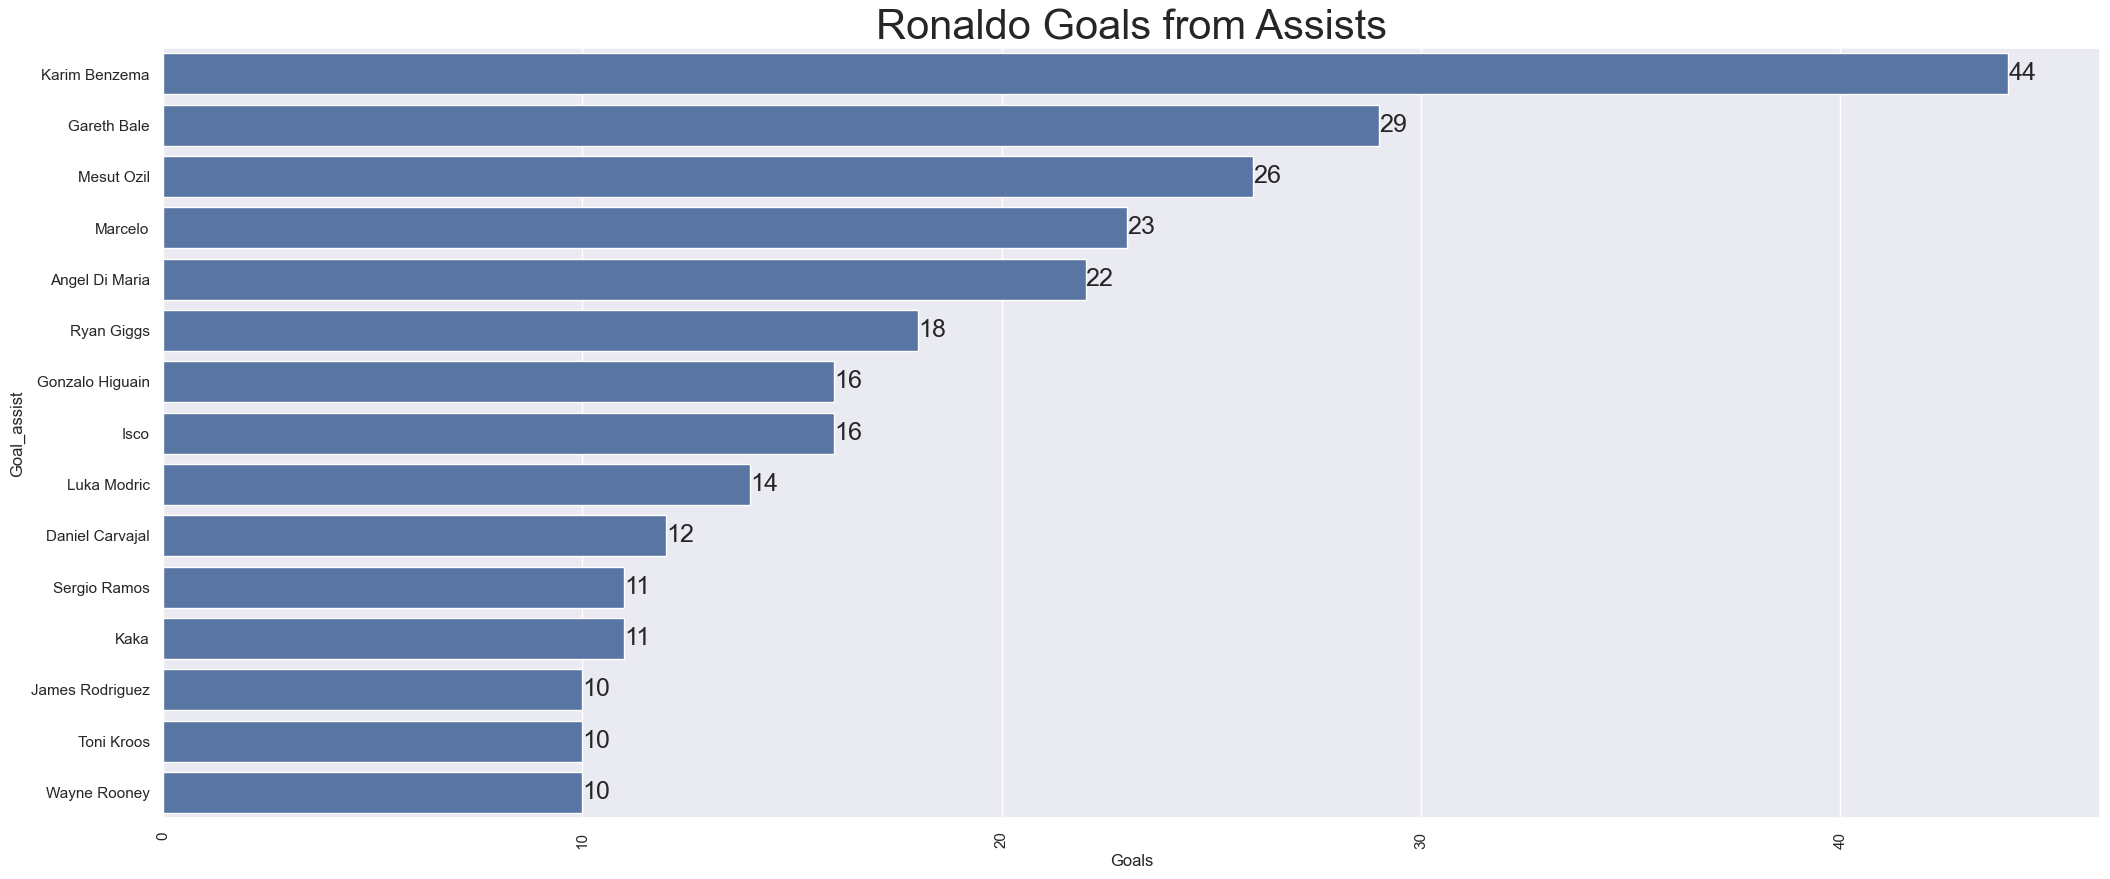

In [30]:
#top 15
sns.set(rc={'figure.figsize':(25,10)})
top_15_Assists = cr7['Goal_assist'].value_counts().nlargest(15).index
plt.xticks(rotation='vertical')
p=sns.countplot(cr7['Goal_assist'],order=top_15_Assists)
p.axes.set_title("Ronaldo Goals from Assists",fontsize=30)
p.set_xlabel("Goals")
# Display counts on the bars
for container in p.containers:
    p.bar_label(container, label_type='edge', fontsize=18)

Karim Benzema (**44**), Gareth Bale (**29**), and Mesut Ozil (**26**) produced the most assists for Ronaldo. 

## j) Goals per Min Gametime

In [31]:
mins=list(map(str, range(1,121)))
mins.insert(45,"1stE")
mins.insert(91,"2ndE")
mins.insert(122,"ExtE")

### i) Messi

In [32]:
messi.loc[messi.Minute.str[:3]=='45+', 'Minute'] = '1stE'
messi.loc[messi.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
messi.loc[messi.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'

In [33]:
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

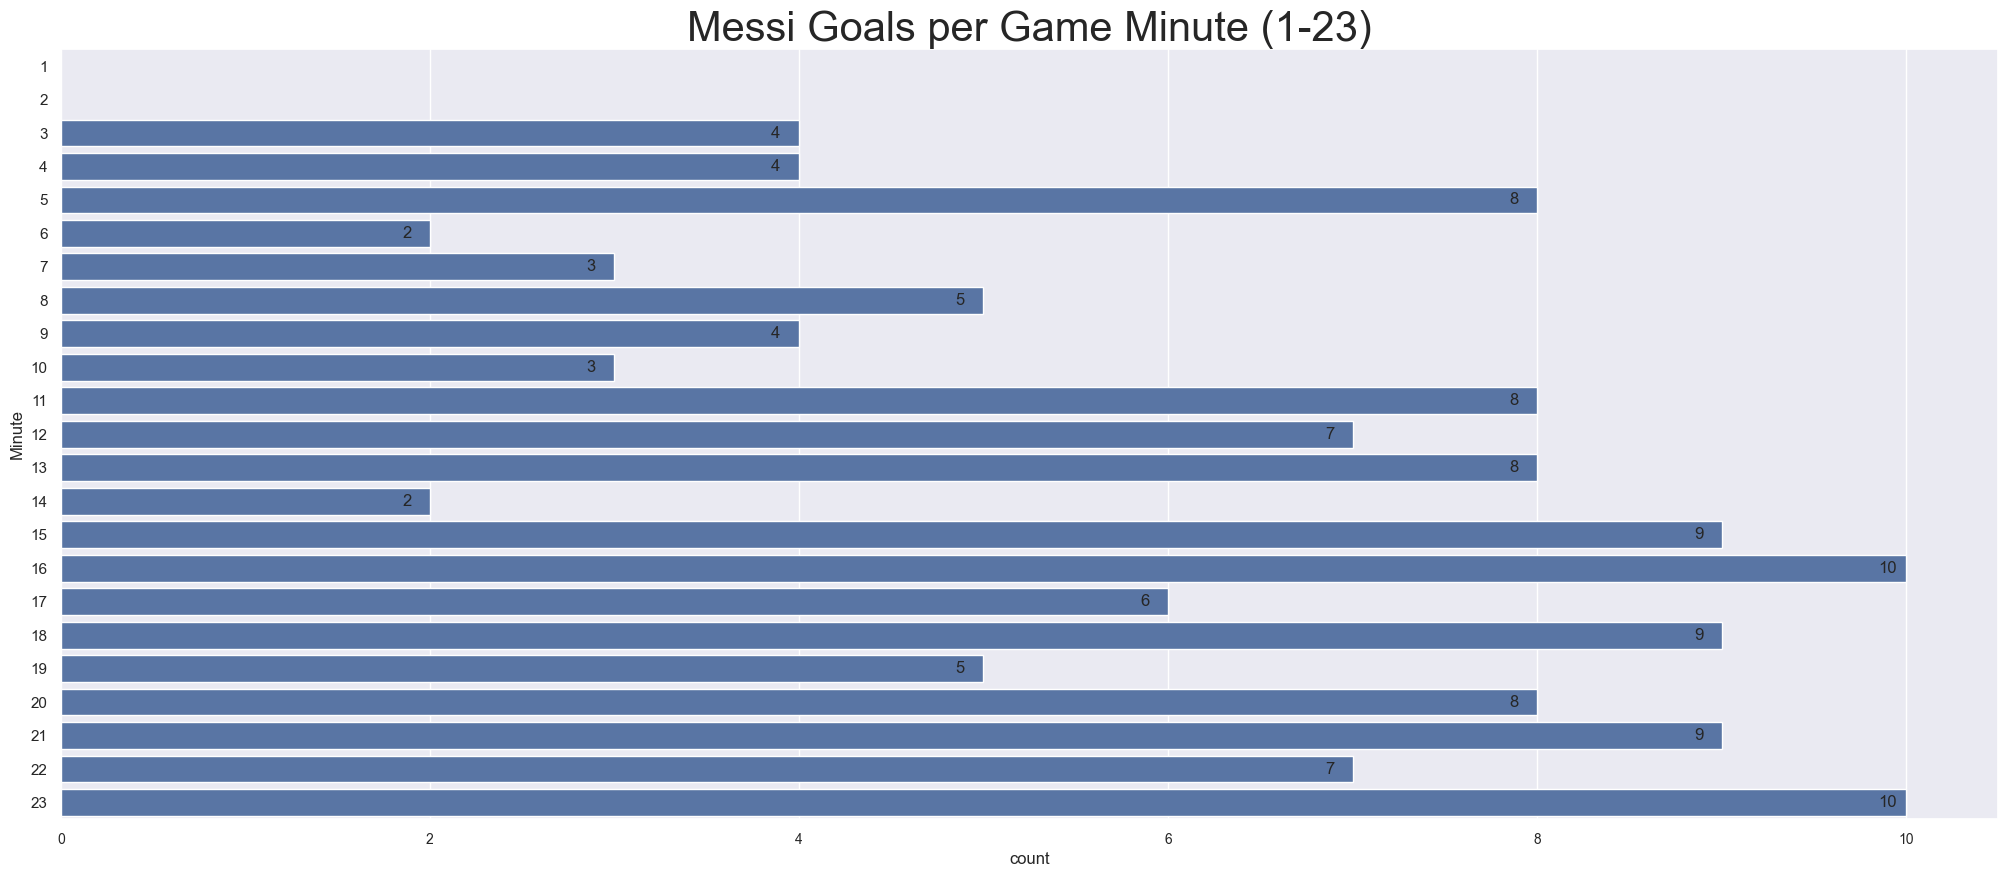

In [34]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(messi['Minute'],order=mins1)
p.axes.set_title("Messi Goals per Game Minute (1-23)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

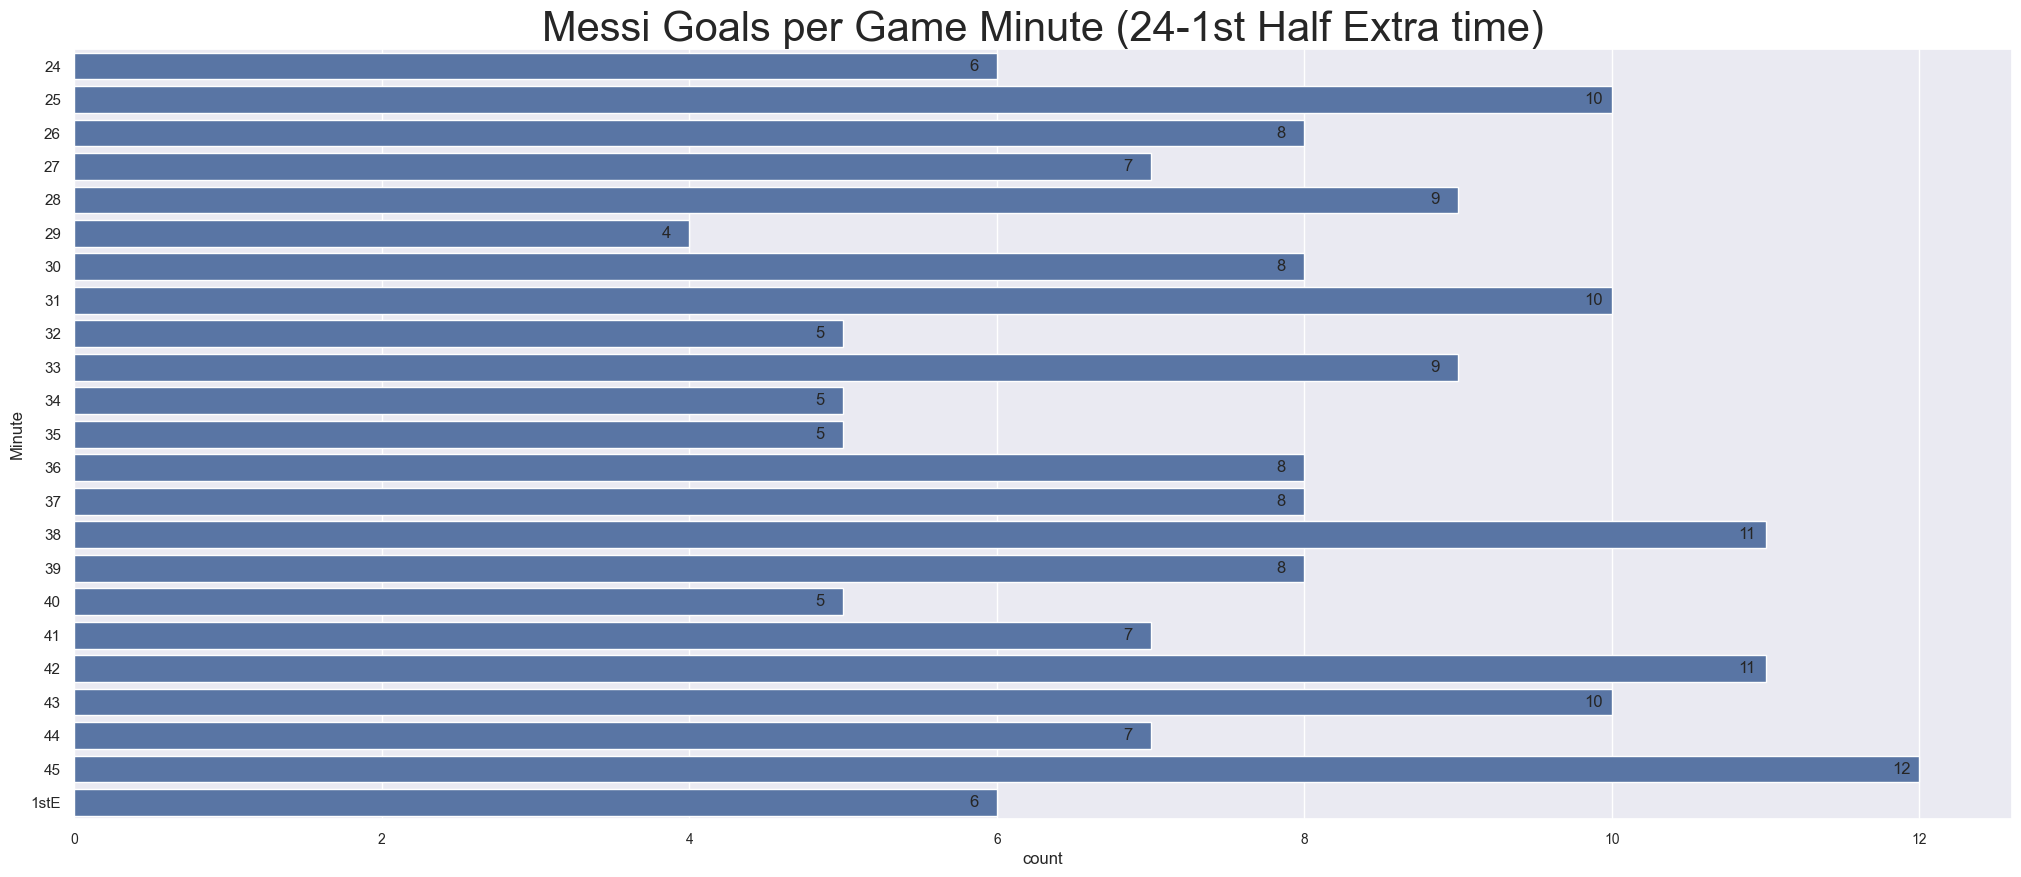

In [35]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(messi['Minute'],order=mins2)
p.axes.set_title("Messi Goals per Game Minute (24-1st Half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

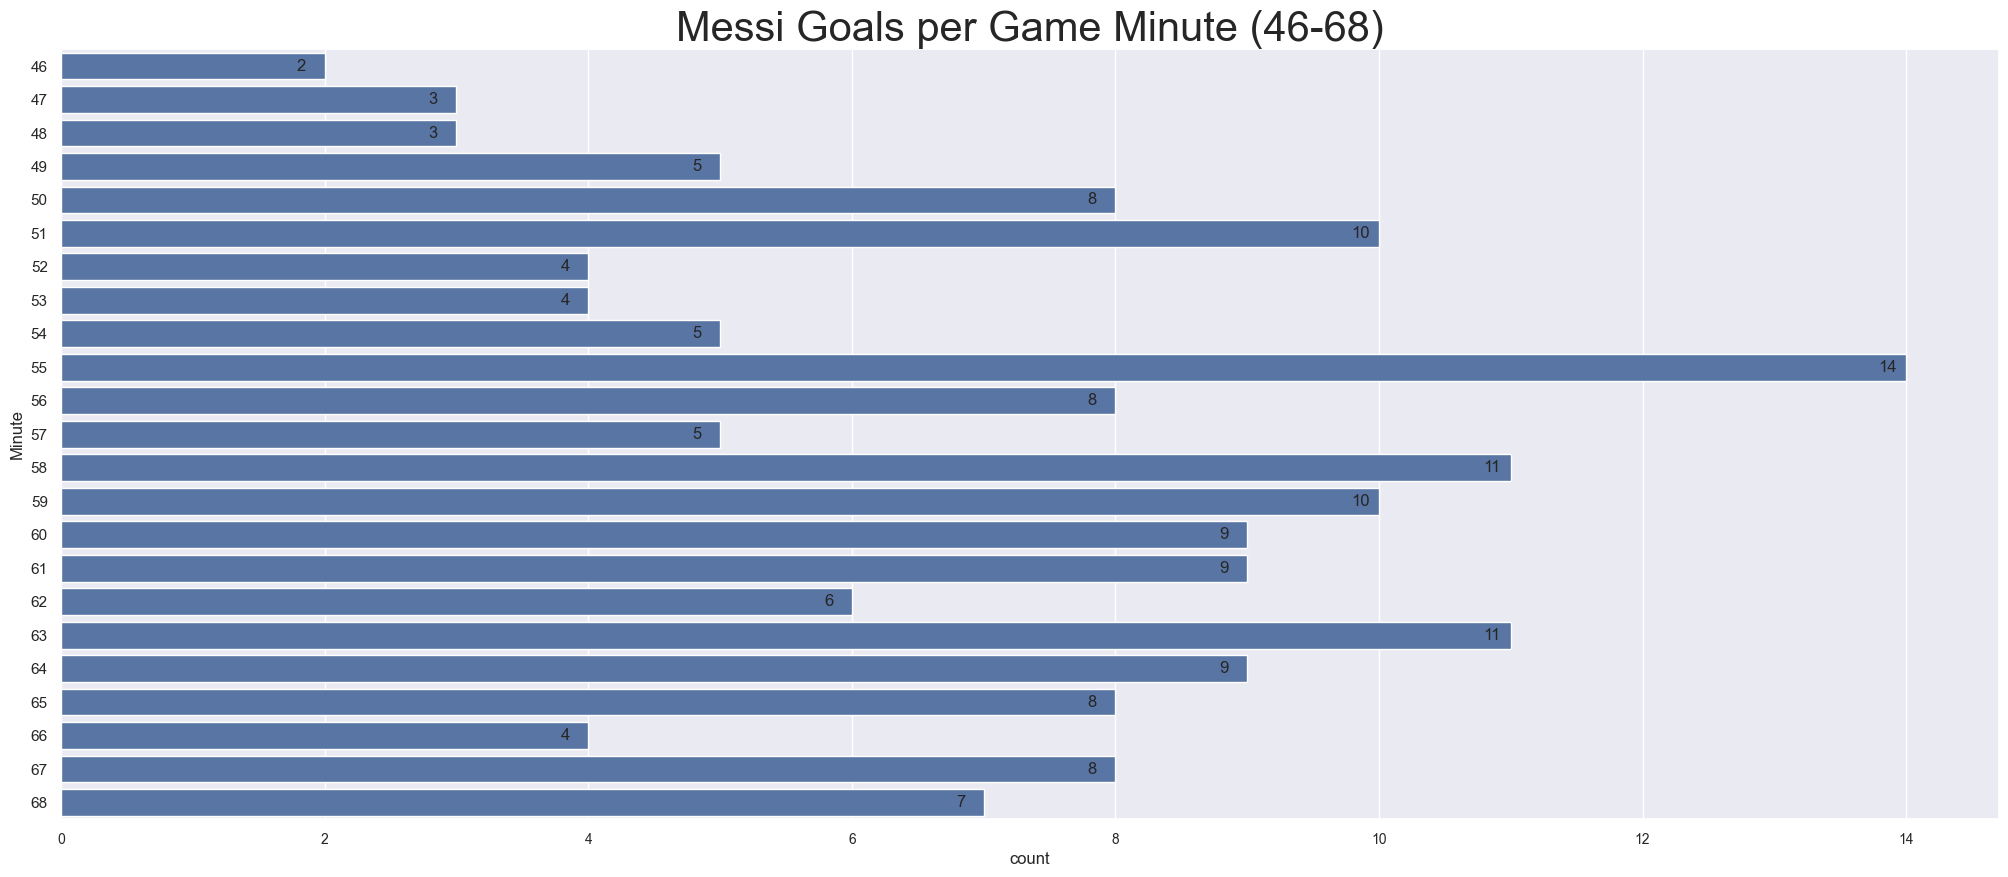

In [36]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(messi['Minute'],order=mins3)
p.axes.set_title("Messi Goals per Game Minute (46-68)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

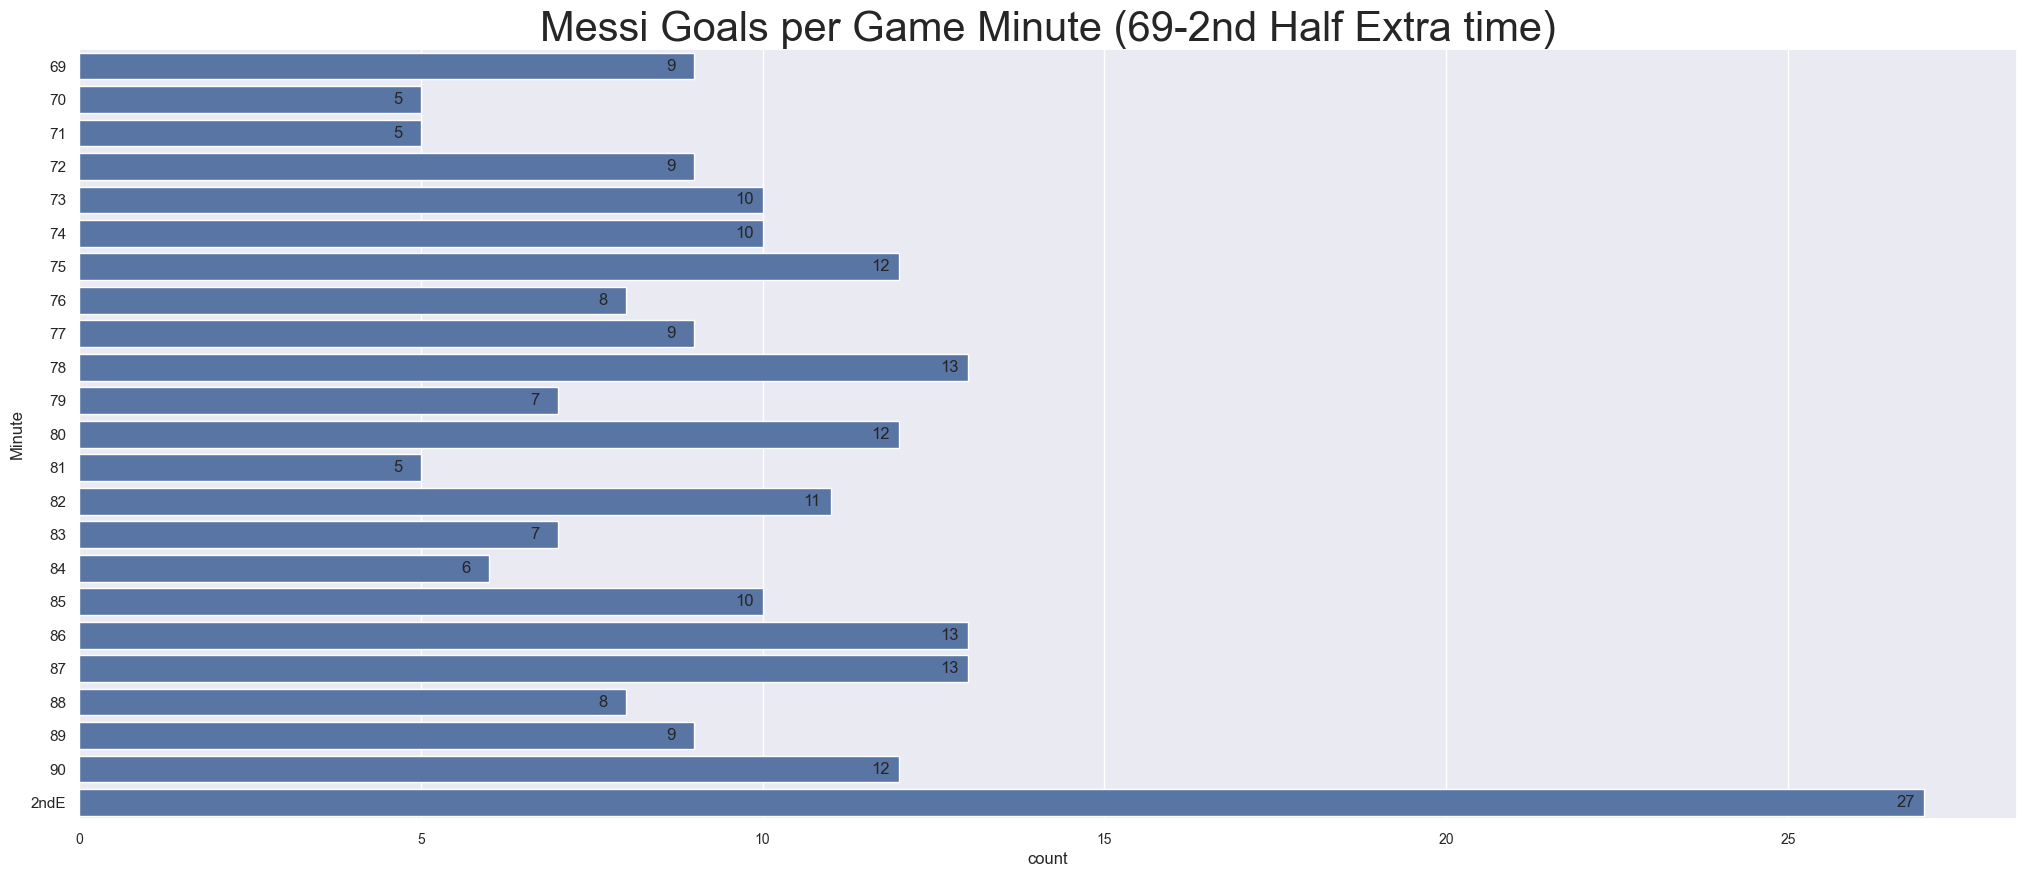

In [37]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(messi['Minute'],order=mins4)
p.axes.set_title("Messi Goals per Game Minute (69-2nd Half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

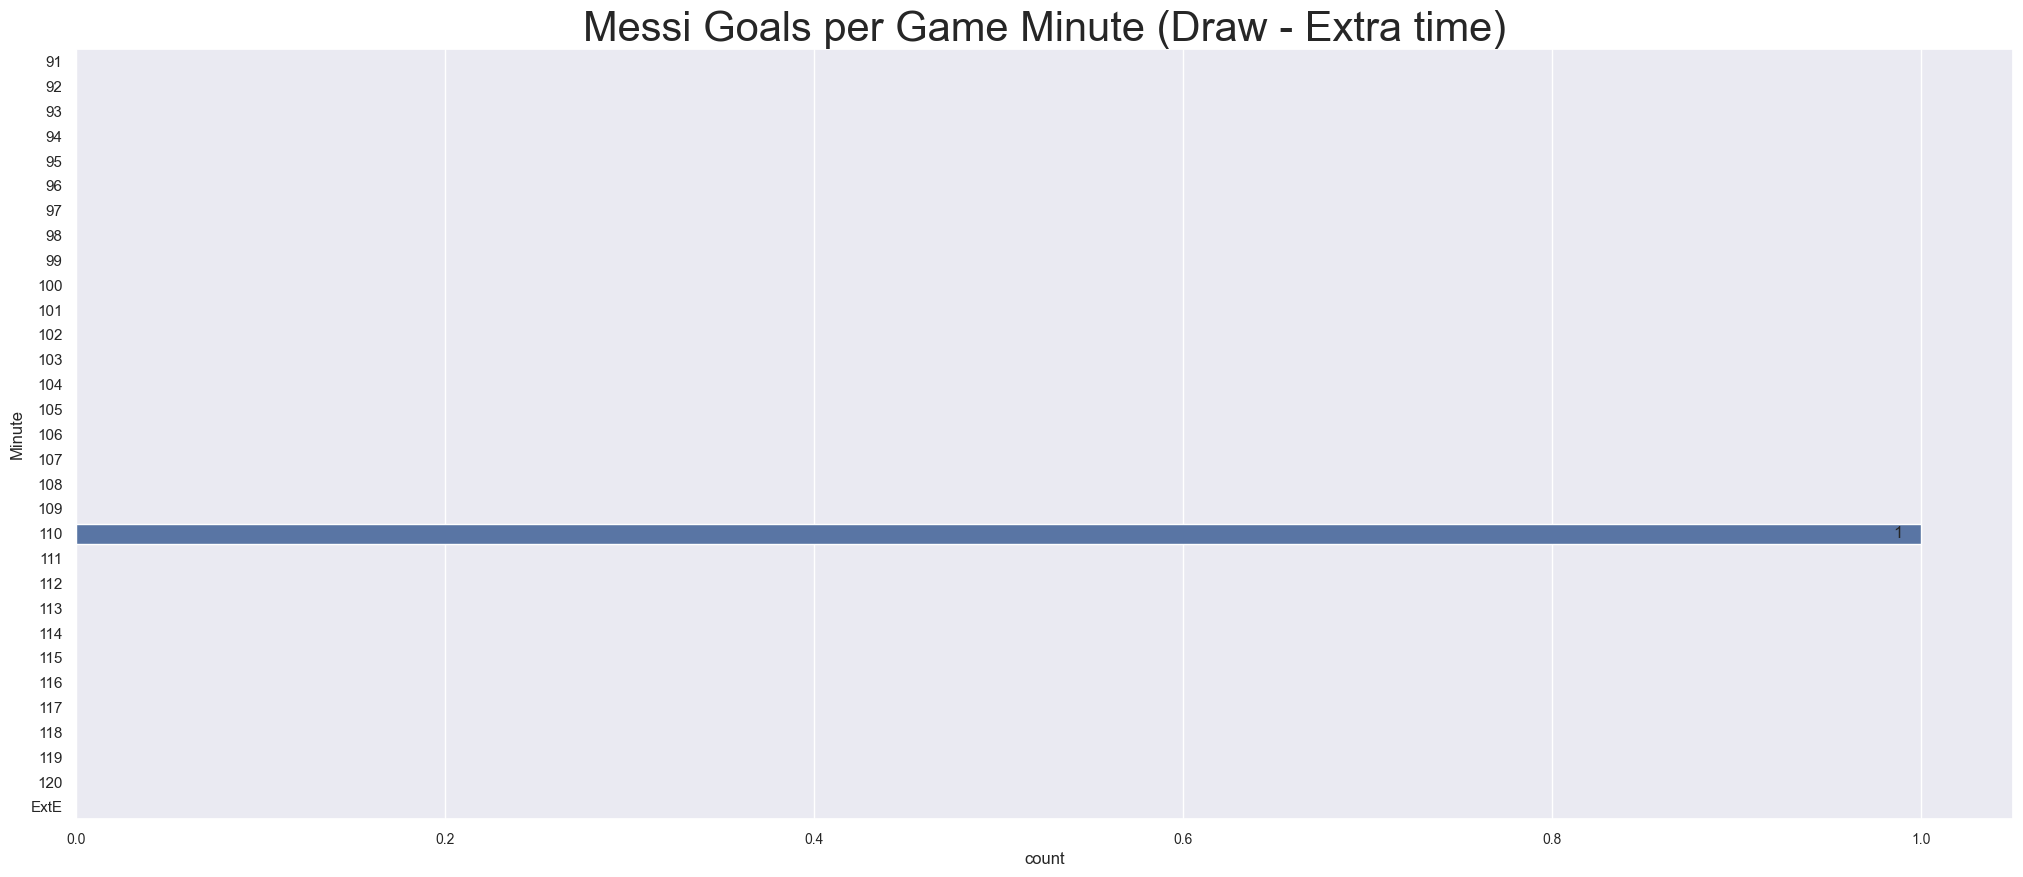

In [38]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(messi['Minute'],order=mins5)
p.axes.set_title("Messi Goals per Game Minute (Draw - Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

In regular game time, Messi has scored in every minute except for the **first two minutes**. Additionally, he has not scored during extra time except for the **110th** minute.


### ii) Ronaldo

In [39]:
cr7.loc[cr7.Minute.str[:3]=='45+', 'Minute'] = '1stE'
cr7.loc[cr7.Minute.str[:3]=='90+', 'Minute'] = '2ndE'
cr7.loc[cr7.Minute.str[:4]=='120+', 'Minute'] = 'ExtE'

In [40]:
mins1=mins[:23]
mins2=mins[23:46]
mins3=mins[46:69]
mins4=mins[69:92]
mins5=mins[92:]

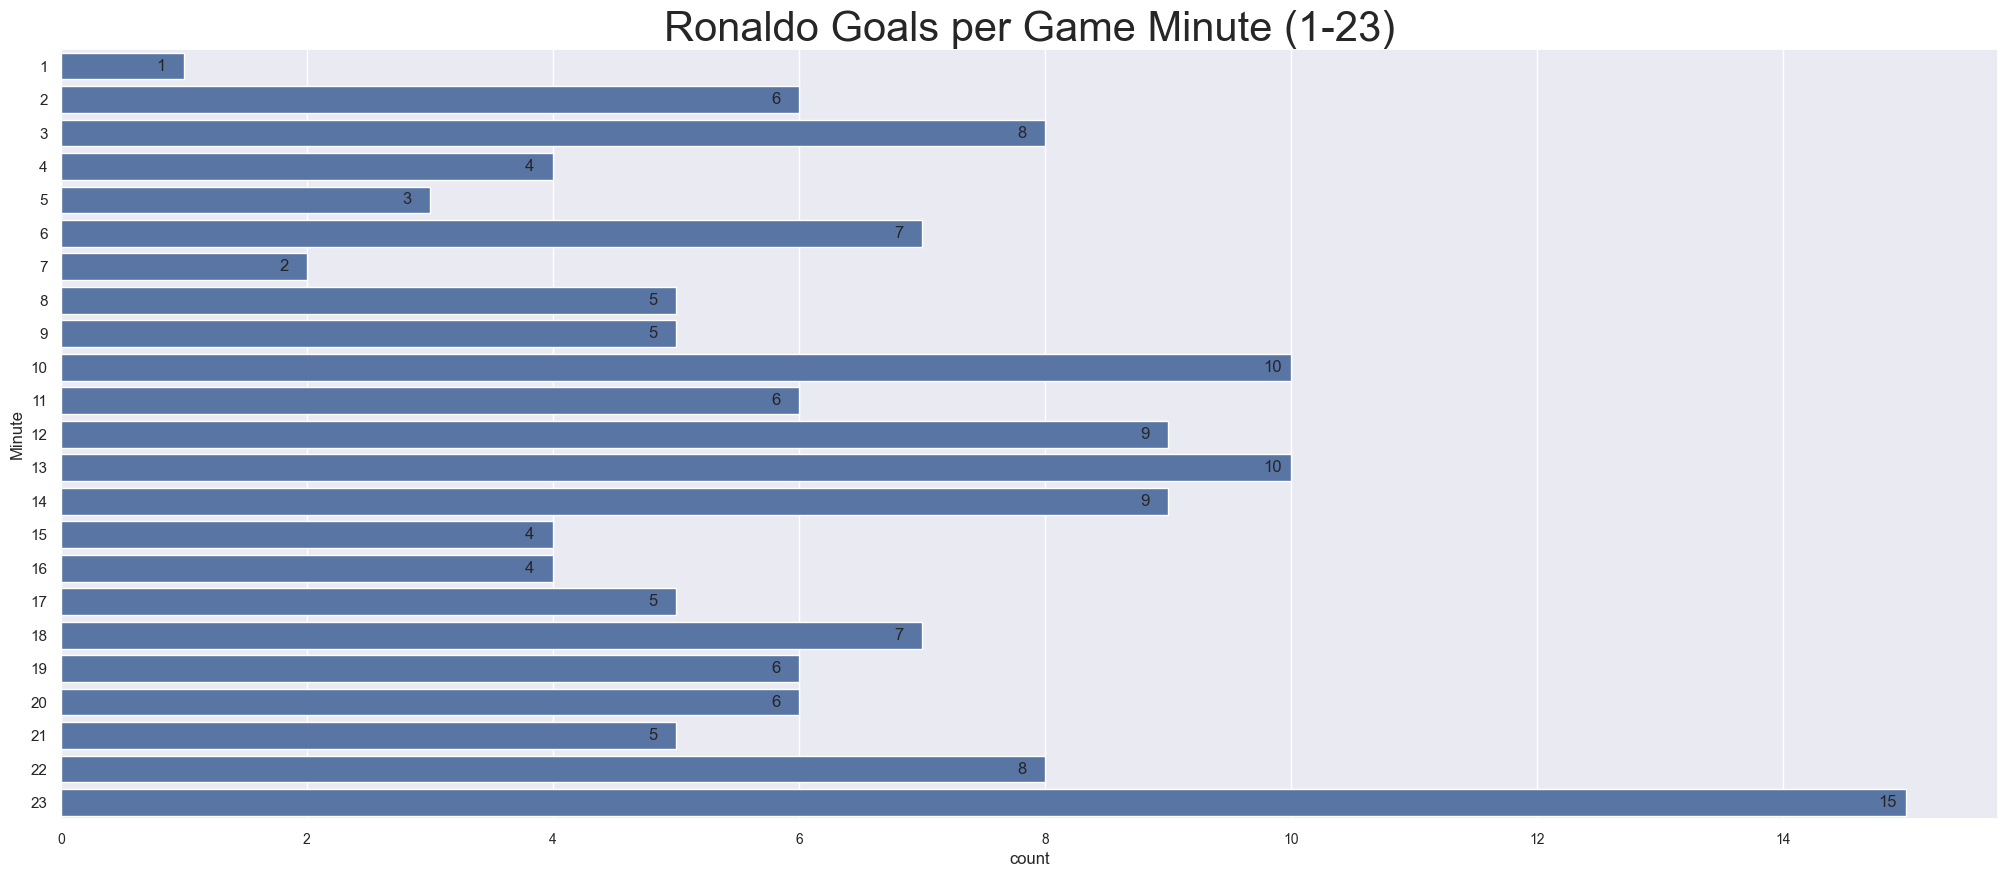

In [41]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(cr7['Minute'],order=mins1)
p.axes.set_title("Ronaldo Goals per Game Minute (1-23)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

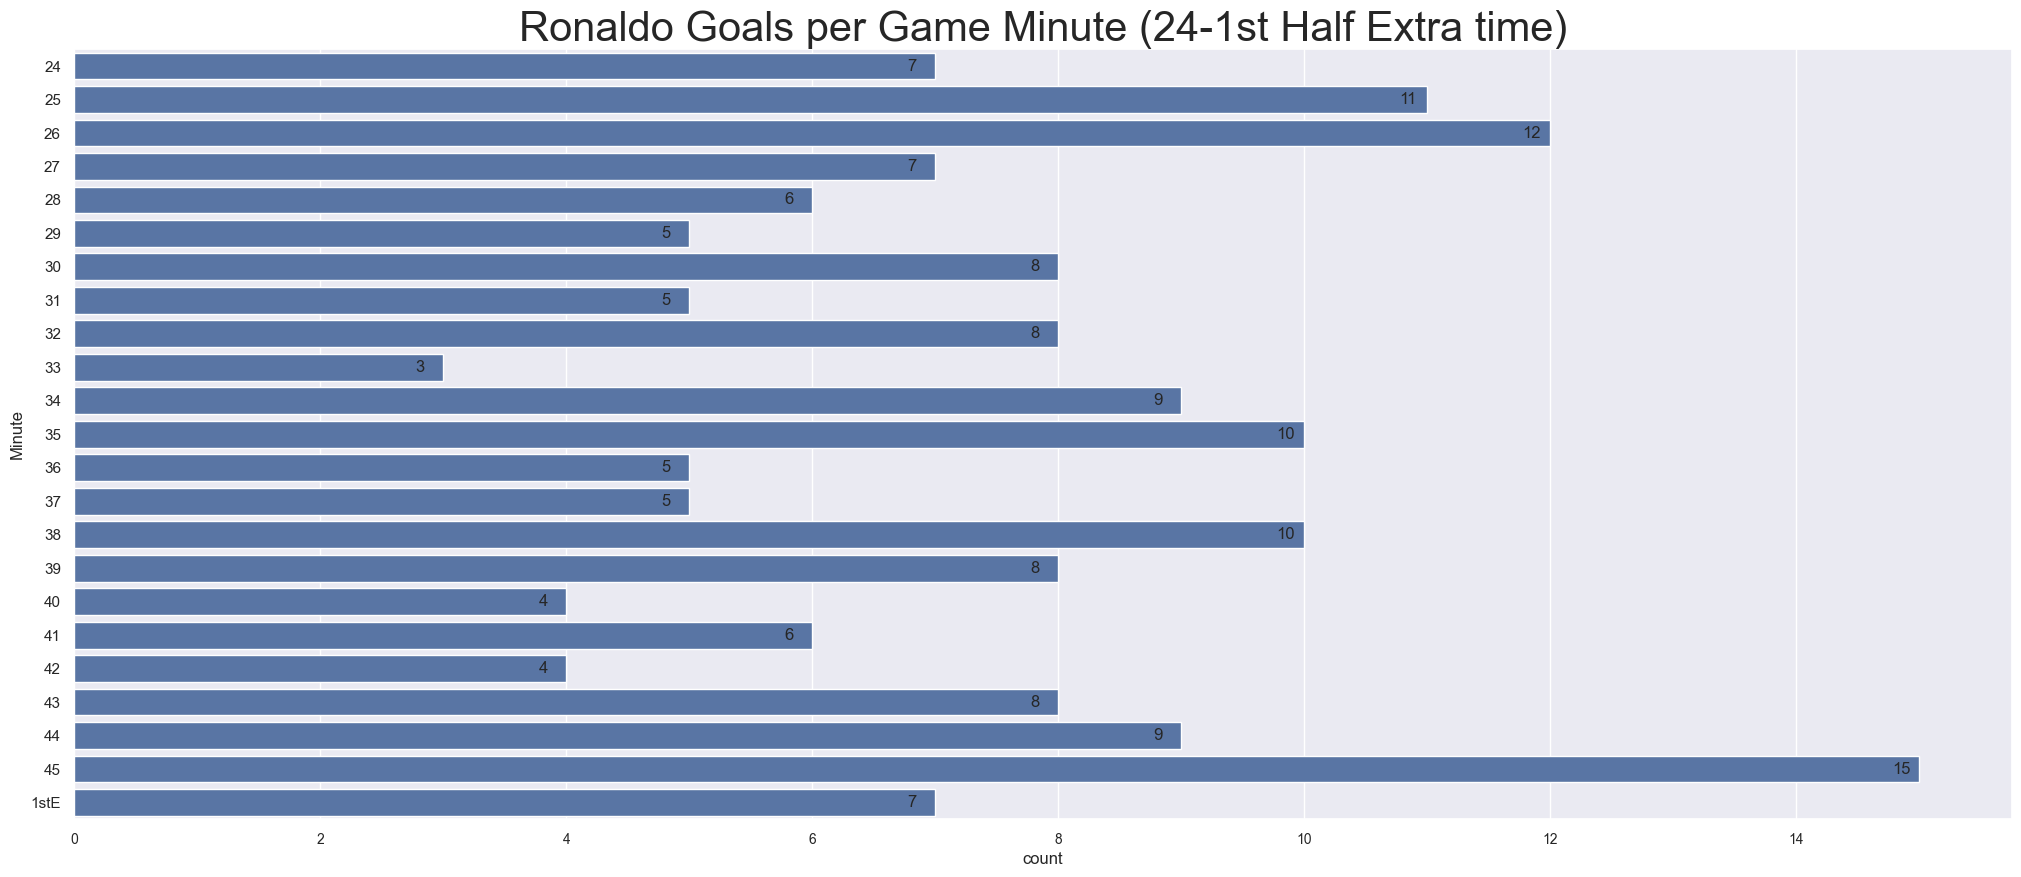

In [42]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(cr7['Minute'],order=mins2)
p.axes.set_title("Ronaldo Goals per Game Minute (24-1st Half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

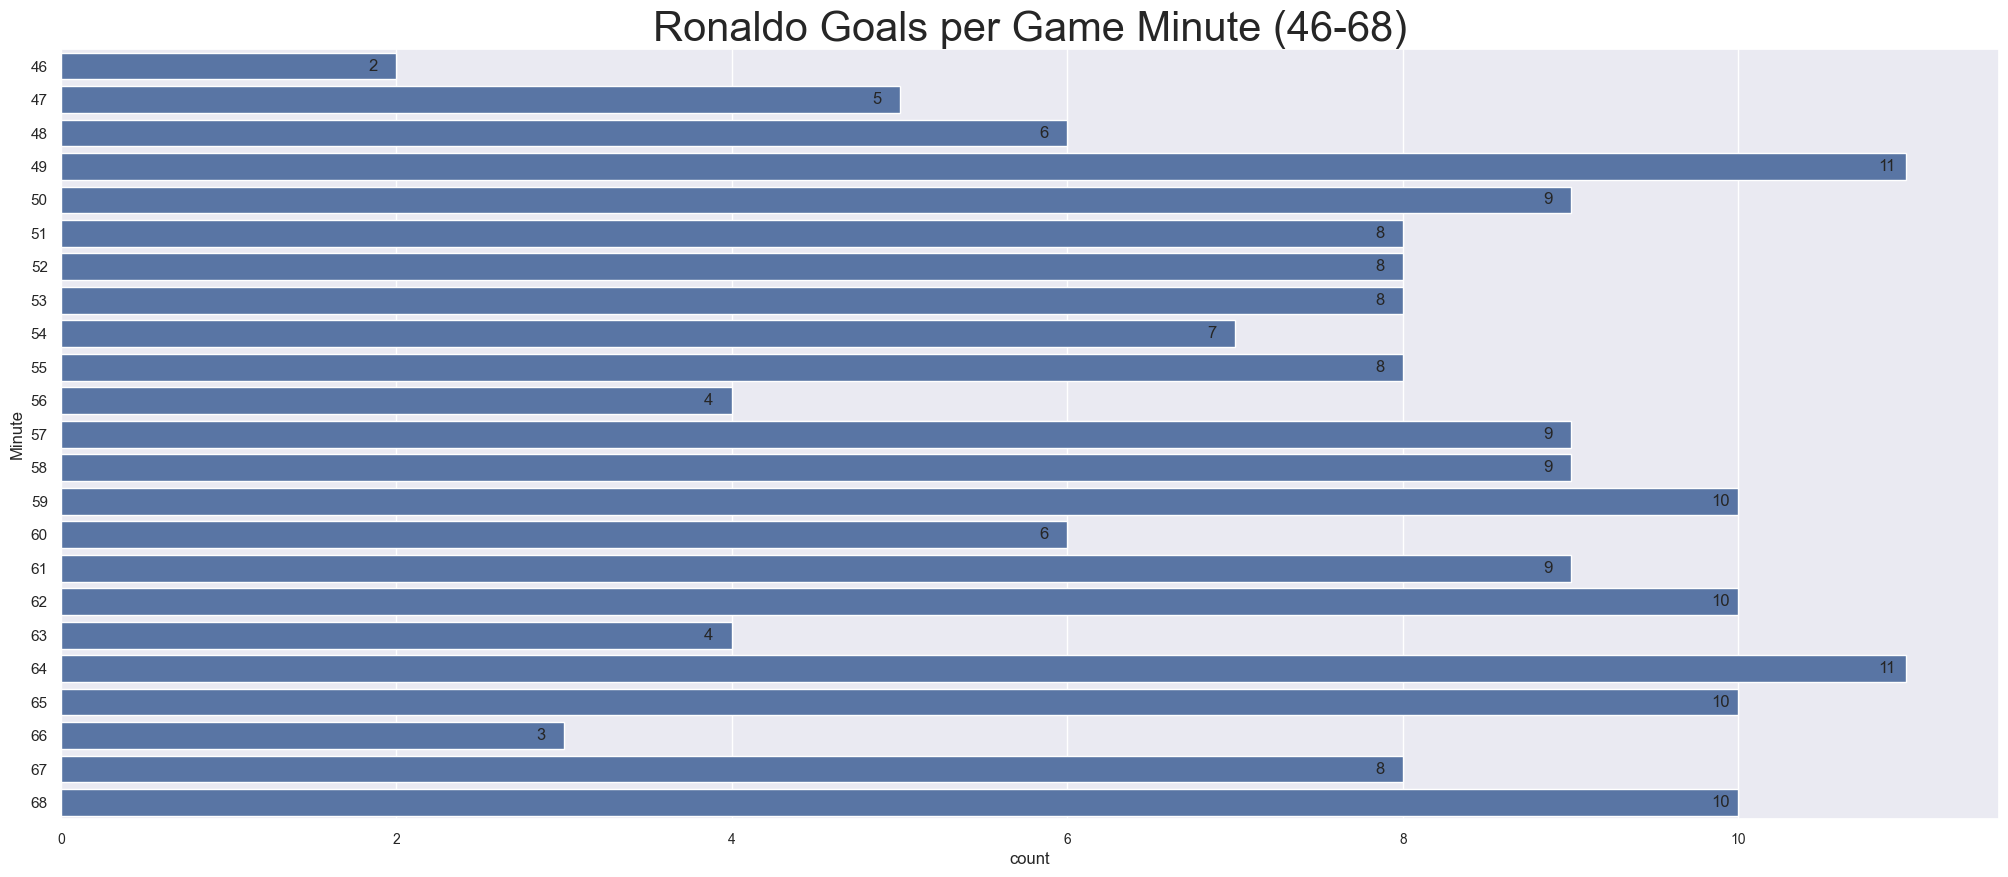

In [43]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(cr7['Minute'],order=mins3)
p.axes.set_title("Ronaldo Goals per Game Minute (46-68)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

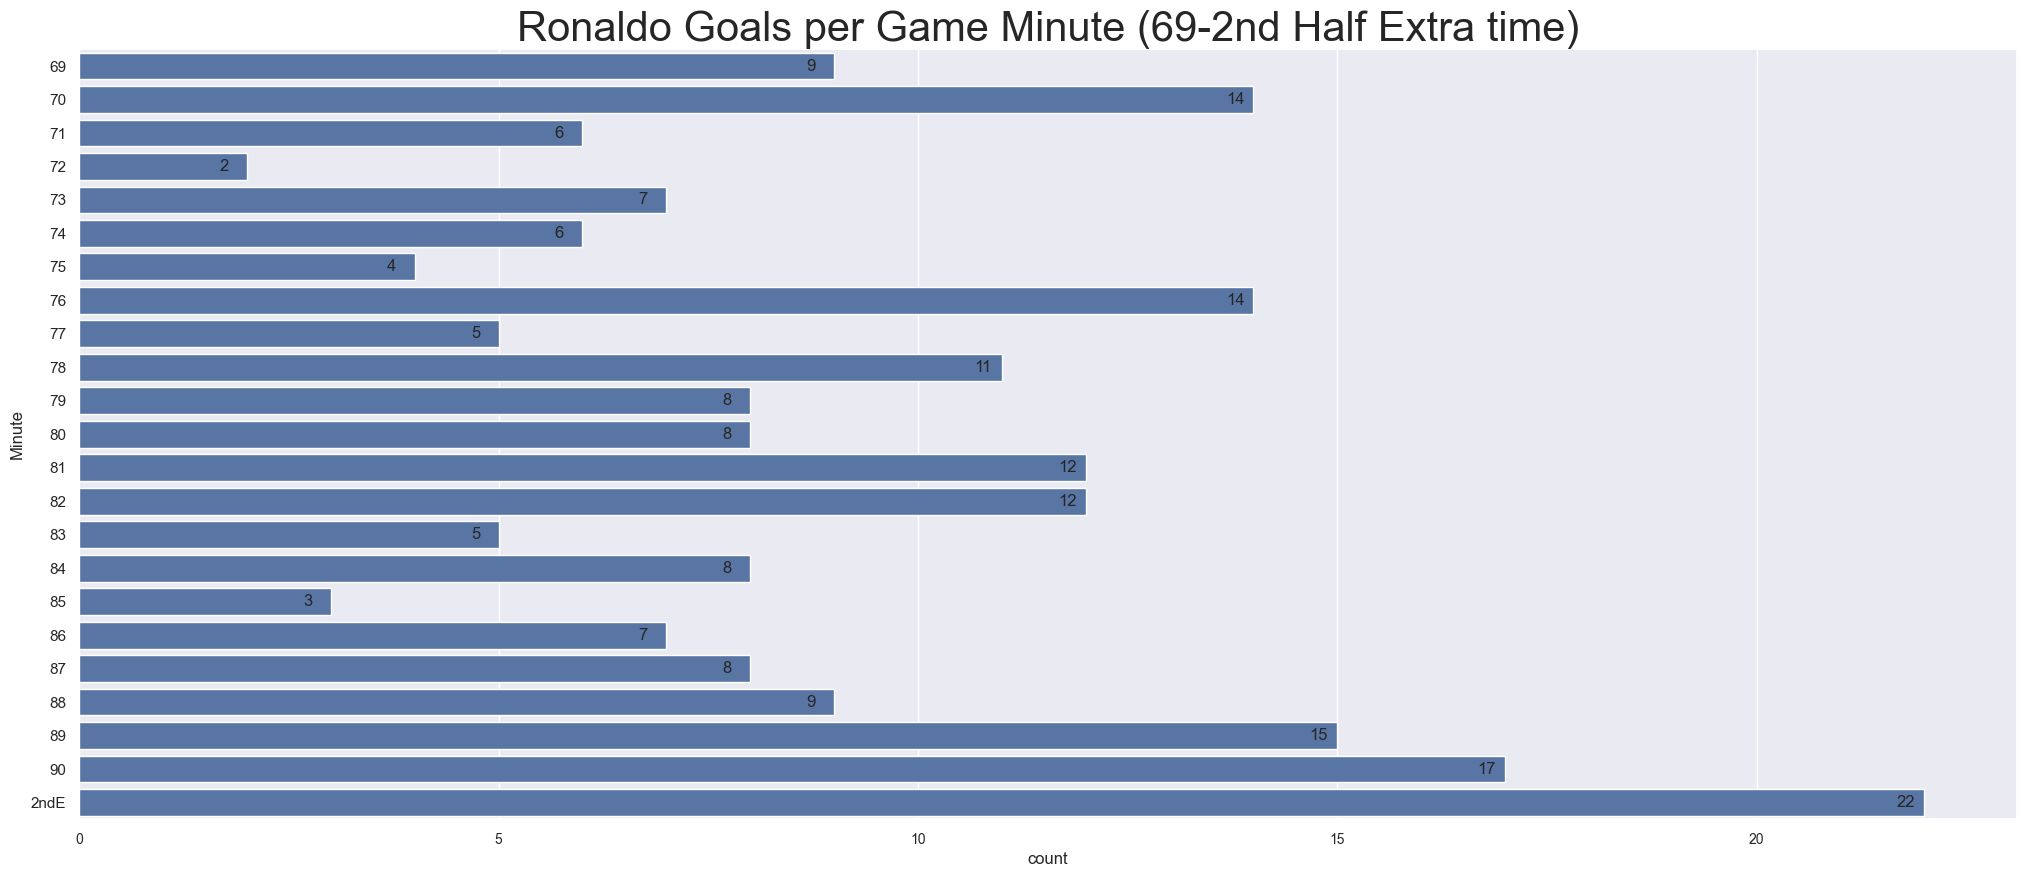

In [44]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(cr7['Minute'],order=mins4)
p.axes.set_title("Ronaldo Goals per Game Minute (69-2nd Half Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)

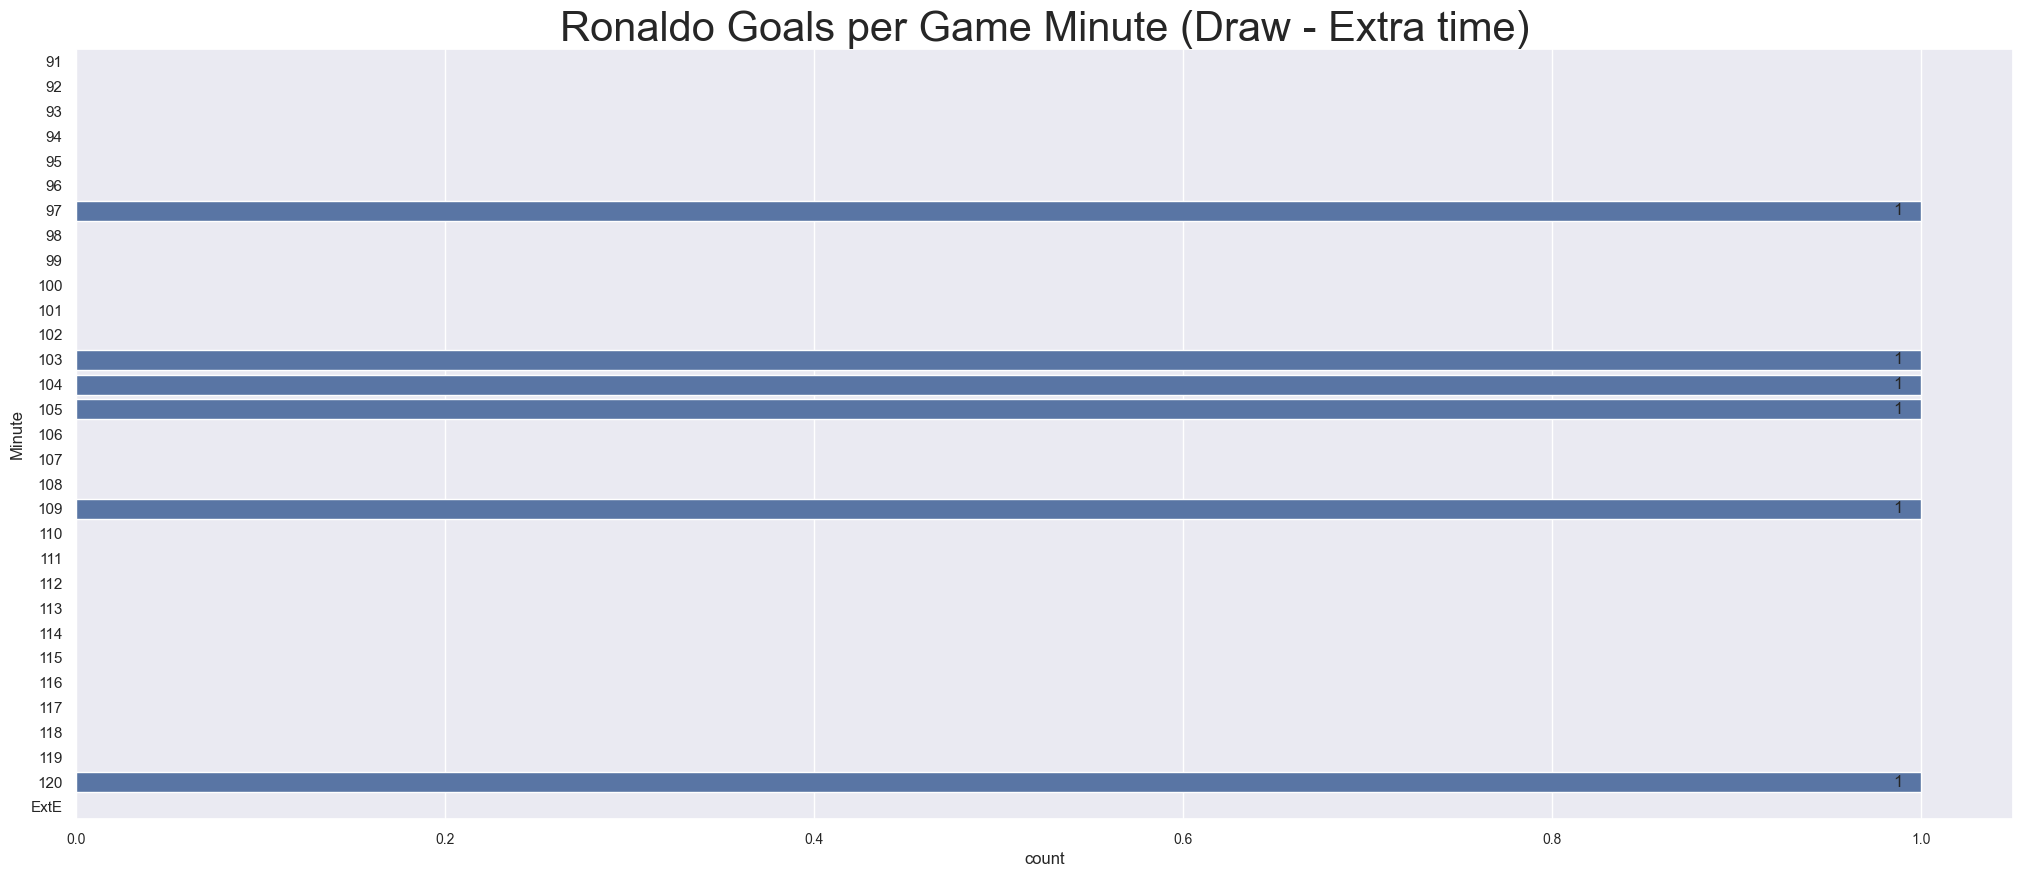

In [45]:
sns.set(rc={'figure.figsize':(25,10)})
plt.xticks(fontsize=10)
p=sns.countplot(cr7['Minute'],order=mins5)
p.axes.set_title("Ronaldo Goals per Game Minute (Draw - Extra time)",fontsize=30)
for container in p.containers:
    p.bar_label(container,label_type='edge',padding=-20)


Ronaldo has scored in every minute during normal game time, and he has also scored in the **97th**, **103rd**, **104th**, **105th**, **109th**, and **120th** minutes.

# 2. Impact of the Goals

In [46]:
#messi 
messi['team_sr']=messi['Result'].str.split(':').str[0]
messi['opponent_sr']=messi['Result'].str.split(':').str[1]
    
messi['opponent_sr']=messi['opponent_sr']\
.replace({'5 on pens':5,'1 AET':1,
              '4 on pens':4,'2 AET':2,
              '00':0,'02':2,'4 AET':2,
              '01':1,'04':4,'03':3,'05':5,
              '06':6,'08':8})
    
messi['team_sr']=messi['team_sr'].astype(int)
messi['opponent_sr']=messi['opponent_sr'].astype(int)
    
messi.loc[messi['team_sr']>messi['opponent_sr'],'result_']='win'
messi.loc[messi['team_sr']<messi['opponent_sr'],'result_']='lost'
messi.loc[messi['team_sr']==messi['opponent_sr'],'result_']='draw'

#ronaldo
cr7['team_sr']=cr7['Result'].str.split(':').str[0]
cr7['opponent_sr']=cr7['Result'].str.split(':').str[1]
    
cr7['opponent_sr']=cr7['opponent_sr']\
.replace({'5 on pens':5,'1 AET':1,
              '4 on pens':4,'2 AET':2,
              '00':0,'02':2,'4 AET':2,
              '01':1,'04':4,'03':3,'05':5,
              '06':6,'08':8})
    
cr7['team_sr']=cr7['team_sr'].astype(int)
cr7['opponent_sr']=cr7['opponent_sr'].astype(int)
    
cr7.loc[cr7['team_sr']>cr7['opponent_sr'],'result_']='win'
cr7.loc[cr7['team_sr']<cr7['opponent_sr'],'result_']='lost'
cr7.loc[cr7['team_sr']==cr7['opponent_sr'],'result_']='draw'



# Create subplots with 1 row and 2 columns
fig = make_subplots(rows=1, cols=2, 
                    specs=[[{"type": "pie"}, {"type": "pie"}]],
                    subplot_titles=('Ronaldo', 'Messi'))

# Data for Ronaldo's final game results
pi_ee = cr7.groupby('result_')['Type'].count().reset_index(name='counts')

# Add Ronaldo's pie chart to the first column
fig.add_trace(go.Pie(values=pi_ee['counts'],
                     labels=pi_ee['result_']), row=1, col=1)

# Data for Messi's final game results
pi_ee1 = messi.groupby('result_')['Type'].count().reset_index(name='counts')

# Add Messi's pie chart to the second column
fig.add_trace(go.Pie(values=pi_ee1['counts'],
                     labels=pi_ee1['result_']), row=1, col=2)

# Update layout with title and dimensions
fig.update_layout(height=500, width=1000, 
                  title_text='Comparing Final Game Results for Ronaldo and Messi after they Score')

# Show the figure
fig.show()


# 3. Goal-Based Performance Measurement Over Time

In [47]:
# Create a new DataFrame with the number of goals scored per season.
messi_goals_per_season = messi.groupby('Season')['Minute'].count()
ronaldo_goals_per_season = cr7.groupby('Season')['Minute'].count()
# Merge the two DataFrames into one.
goals_per_season = pd.merge(messi_goals_per_season, ronaldo_goals_per_season, on='Season', how='outer')
goals_per_season = goals_per_season.reindex(ronaldo_goals_per_season.index)
# Rename the columns
goals_per_season = goals_per_season.rename_axis(None, axis=0)
goals_per_season = goals_per_season.rename_axis('Season', axis=1)

goals_per_season = goals_per_season.rename(columns={'Minute_x': 'Messi goals', 'Minute_y': 'Ronaldo goals'})

In [48]:
# Extract the data
seasons = goals_per_season.index
messi_goals = goals_per_season['Messi goals']
ronaldo_goals = goals_per_season['Ronaldo goals']


# Create a line plot
fig = px.line(goals_per_season, x=seasons, y=['Messi goals', 'Ronaldo goals'], labels={'variable': 'Player'})

fig.update_traces(mode='lines+markers', hovertemplate='%{y}')
fig.update_layout(
    title='Goals Scored Over Seasons (Messi vs. Ronaldo)',
    xaxis_title='Season',
    yaxis_title='Goals Scored',
    legend_title='Player'
)


fig.show()
